# Basic Study CV Session Week 1

이번 과제는 colab, torch 등 Deep learning 코드의 가장 기본적인 부분들부터 CNN 구현까지의 내용입니다. DL에 대해 코드를 많이 작성하고 디버깅 해보신 분들도 정독하시고, 아는 것들을 복습하는 시간이 되었으면 좋겠습니다.


> `이번 CNN 구현은 MNIST(손글씨 이미지)를 간단한 CNN class로 학습하는 과제입니다.`


> ***Text들을 잘 읽으시고, 빈칸을 채워서 과제를 7월 15일(월)까지 저에게 DM으로 .ipynb로 제출하시면 됩니다.***


## Basic of DL Programming

DL 프로그래밍을 할 때 기본적으로 필요한 것은 컴퓨터와 코드입니다.
이 때, DL은 많은 parameter(연상량)을 기본으로 하는 분야기 때문에 현재는 **GPU에서 연산을 하는 방식을 취하고 있습니다**. 모든 사람이 GPU를 보유하고 있는 것이 아니기 때문에 이러한 하드웨어 측면을 Colab을 통하여 극복합니다.

Colab은 우리가 웹에서 DL 학습을 할 수 있는 좋은 환경을 제공하지만, local PC만큼 세팅이 자유로운 것은 아니며, 거의 모든 툴들이 최신 버전으로 업데이트 되어 있습니다. 하지만 여러분이 사용하는 많은 github 코드들은 각자만의 conda(가상환경)을 기반으로 이전 버전을 기반으로 작동하게 작성되어 있는 경우도 많기 때문에 이러한 부분에서는 colab이 자유롭지 못하다는 단점이 있습니다.

### Google Colab

Google Colab은 클라우드에서 실행되는 Jupyter Notebook 환경으로, 데이터 과학 및 머신 러닝 실험을 수행할 수 있도록 지원합니다. Colab은 Google Drive와 연동되어 있어 파일을 저장하고 공유하기에 편리합니다.

Google Colab의 주요 특징:
- **무료 GPU/TPU 사용**: Colab은 무료로 GPU 및 TPU를 사용할 수 있게 해주어, 대규모 계산을 빠르게 수행할 수 있습니다. ***(여러분은 T4로 런타임 유형을 바꾼 후 과제를 진행해주세요!)***
- **설치 필요 없음**: 브라우저에서 실행되므로 별도의 설치가 필요 없습니다.
- **풍부한 라이브러리**: 다양한 머신 러닝 및 데이터 과학 라이브러리가 사전 설치되어 있어 바로 사용할 수 있습니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Google_Colaboratory_SVG_Logo.svg/512px-Google_Colaboratory_SVG_Logo.svg.png" alt="Colab 로고" width="300"/>


### Conda

Conda는 데이터 과학 및 머신 러닝 환경을 관리하는 패키지 관리자입니다. conda를 사용하면 패키지와 그에 필요한 모든 종속성을 손쉽게 설치하고 관리할 수 있습니다.

Conda의 주요 기능:
- **환경 관리**: 프로젝트마다 독립된 환경을 생성하고 관리할 수 있습니다.
- **패키지 설치**: 다양한 패키지를 간편하게 설치하고 업데이트할 수 있습니다.
- **호환성 관리**: 패키지 간의 종속성을 자동으로 관리하여 호환성을 보장합니다.

<img src="https://upload.wikimedia.org/wikipedia/en/c/cd/Anaconda_Logo.png" alt="conda 로고" width="300"/>

### PyTorch

PyTorch는 딥러닝 연구 및 애플리케이션을 위한 오픈소스 라이브러리입니다. PyTorch는 유연성과 사용 편의성 덕분에 널리 사용되고 있습니다.

PyTorch의 주요 특징:
- **동적 그래프**: 계산 그래프를 동적으로 생성하여 유연한 모델링이 가능합니다.
- **자동 미분**: Autograd를 사용하여 자동으로 기울기를 계산할 수 있습니다.
- **다양한 모듈**: 신경망을 쉽게 구축할 수 있는 다양한 모듈을 제공합니다.

<img src="https://pytorch.org/assets/images/pytorch-logo.png" alt="PyTorch 로고" width="300"/>


In [2]:
# Library
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [3]:
# HyperParmeter를 설정해보세요!
batch_size =  64      #64
learning_rate =  0.001   #0.001
num_epochs =  10      #10

## MNIST Dataset

이번 과제의 data는 MNIST입니다.

MNIST 데이터셋은 손으로 쓴 숫자(0-9)를 포함하는 이미지 데이터셋입니다. 이 데이터셋은 머신 러닝 알고리즘을 훈련하고 테스트하는 데 널리 사용됩니다.

MNIST 데이터셋의 특징:
- **훈련 이미지**: 60,000장
- **테스트 이미지**: 10,000장
- **이미지 크기**: 28x28 픽셀
- **채널**: 그레이스케일 (1 채널)

![MNIST 데이터셋](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


In [4]:
# Dataset load, preprocess
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 51321512.50it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1742809.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14042447.59it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4173171.69it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Convolutional Neural Network (CNN)

**Session때 말씀드렸던 대로 보통 DL model은 class로 정의하여 사용합니다.**

> **가장 기본적인 구성은 init, forward입니다.**


Convolutional Neural Network (CNN)은 주로 이미지 인식 및 분류에 사용되는 딥러닝 모델입니다. CNN은 이미지의 공간적 계층 구조를 학습하여 특징을 추출하고 이를 기반으로 분류 작업을 수행합니다.

CNN의 주요 구성 요소는 다음과 같습니다:
- **Convolutional Layer**: 필터를 사용하여 입력 이미지에서 특징 맵을 추출합니다.
- **Pooling Layer**: 특징 맵의 차원을 축소하여 계산량을 줄이고 중요한 정보를 유지합니다.
- **Fully Connected Layer**: 추출된 특징을 사용하여 최종 분류 작업을 수행합니다.

In [8]:
# CNN Model
class CNN(nn.Module):  # Define a class for the CNN model
    def __init__(self):  # Initialization method
        super(CNN, self).__init__()  # Call the parent class constructor
        self.layer1 = nn.Sequential(  # Define the first layer
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # 2D convolutional layer
            nn.ReLU(),  # ReLU activation function
            nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
        )
        self.layer2 = nn.Sequential(  # Define the second layer
            nn.Conv2d(32, 64, kernel_size=3),  # 2D convolutional layer
            nn.ReLU(),  # ReLU activation function
            nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
        )
        self.fc1 = nn.Linear(64*6*6, 100)  # Fully connected layer
        self.dropout = nn.Dropout(0.5)  # Dropout layer
        self.fc2 = nn.Linear(100, 10)  # Output layer

    def forward(self, x):  # Forward pass method
        x = self.layer1(x)  # Pass input through the first layer
        x = self.layer2(x)  # Pass input through the second layer
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.fc1(x)  # Pass input through the fully connected layer
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)  # Pass input through the output layer
        return x  # Return the final output

### Adam Optimizer

Adam Optimizer는 확률적 경사 하강법(Stochastic Gradient Descent)의 변형으로, 학습 속도와 성능을 향상시키기 위해 설계된 최적화 알고리즘입니다. Adam은 Adaptive Moment Estimation의 약자로, 1차 및 2차 모멘트를 사용하여 학습률을 조정합니다.

Adam Optimizer의 주요 특징:
- **적응적 학습률**: 각 파라미터마다 학습률을 개별적으로 조정하여 학습 속도를 향상시킵니다.
- **빠른 수렴 속도**: 다른 최적화 알고리즘보다 빠르게 수렴할 수 있습니다.
- **넓은 사용 범위**: 다양한 딥러닝 모델에 효과적으로 적용할 수 있습니다.


In [9]:
# Model Instance
model = CNN()

# Loss 및 Optimizer 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
# Train Function
def train(model, train_loader, criterion, optimizer, num_epochs):  # Define the training function
    model.train()  # Set the model to training mode
    total_step = len(train_loader)  # Get the total number of steps per epoch
    train_losses = []  # List to store training losses

    for epoch in range(num_epochs):  # Loop over epochs
        running_loss = 0.0  # Initialize running loss

        for i, (images, labels) in enumerate(train_loader):  # Loop over batches
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute the loss

            optimizer.zero_grad()  # Zero the gradients
            loss.backward()  # Backpropagation
            optimizer.step()  # Update the weights

            running_loss += loss.item()  # Update running loss

            if (i+1) % 100 == 0:  # Print log info every 100 steps
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')  # Print the current loss

        train_losses.append(running_loss / len(train_loader))  # Append average loss for the epoch

    return train_losses  # Return training losses

In [11]:
# 모델 학습
train_losses = train(model, train_loader, criterion, optimizer, num_epochs)  # Train the model

Epoch [1/10], Step [100/938], Loss: 0.0864
Epoch [1/10], Step [200/938], Loss: 0.1501
Epoch [1/10], Step [300/938], Loss: 0.1459
Epoch [1/10], Step [400/938], Loss: 0.1074
Epoch [1/10], Step [500/938], Loss: 0.0488
Epoch [1/10], Step [600/938], Loss: 0.0417
Epoch [1/10], Step [700/938], Loss: 0.1107
Epoch [1/10], Step [800/938], Loss: 0.1261
Epoch [1/10], Step [900/938], Loss: 0.0277
Epoch [2/10], Step [100/938], Loss: 0.0524
Epoch [2/10], Step [200/938], Loss: 0.0277
Epoch [2/10], Step [300/938], Loss: 0.1601
Epoch [2/10], Step [400/938], Loss: 0.0090
Epoch [2/10], Step [500/938], Loss: 0.0812
Epoch [2/10], Step [600/938], Loss: 0.1194
Epoch [2/10], Step [700/938], Loss: 0.0733
Epoch [2/10], Step [800/938], Loss: 0.0051
Epoch [2/10], Step [900/938], Loss: 0.0939
Epoch [3/10], Step [100/938], Loss: 0.0846
Epoch [3/10], Step [200/938], Loss: 0.0042
Epoch [3/10], Step [300/938], Loss: 0.0990
Epoch [3/10], Step [400/938], Loss: 0.0097
Epoch [3/10], Step [500/938], Loss: 0.0387
Epoch [3/10

## Weights and Biases (wandb)

보통 DL model을 학습하고, 평가할 때 시각화는 wandb를 통해서 많이 진행합니다. 하지만 colab에서는 직접 시각화하는게 편한 경우가 많아서 아래와 같이 plot합니다.

Weights and Biases (wandb)는 머신 러닝 실험을 추적하고 시각화하는 도구입니다. wandb를 사용하면 실험 결과를 손쉽게 기록하고 비교할 수 있습니다.

wandb의 주요 기능:
- **실험 추적**: 학습 과정의 메트릭을 실시간으로 기록하고 시각화합니다.
- **모델 저장**: 학습된 모델을 쉽게 저장하고 공유할 수 있습니다.
- **협업**: 팀원들과 실험 결과를 공유하고 협력할 수 있습니다.


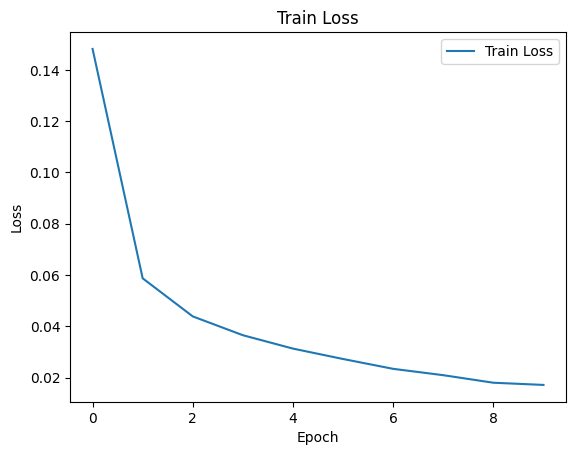

In [12]:
# Loss Visualization
plt.plot(train_losses, label='Train Loss')  # Plot training losses
plt.title('Train Loss')  # Set plot title
plt.xlabel('Epoch')  # Set x-axis label
plt.ylabel('Loss')  # Set y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot

In [13]:
# Evaluation Function
def evaluate(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f'Test Accuracy of the model on the 10000 test images: {100 * correct / total} %')

In [14]:
# Model Evaluation
evaluate(model, test_loader)

Test Accuracy of the model on the 10000 test images: 99.19 %
